# Defining a Geometry Model with AGORA

AGORA is the native geometry navigation engine of TRIPOLI-5. The AGORA geometry engine can be installed and used independently of the other modules of TRIPOLI-5. It is defined using the `tripoli5.agora` module.

AGORA can model multi-level nested geometries by means of universes: each universe contains elementary volumes whose shape is defined by a Constructive Solid Geometry (CSG) paradigm. A shape is a combination of Boolean operators (intersection, union or complement) and half-spaces; each half-space being defined with respect to single elementary surface (planes, spheres, cylinders, cones, or quadrics). The geometries produced with AGORA have the structure of a tree, since each volume can contain a label referring to the material, a universe or a (Cartesian or hexagonal) lattice: the latter is represented by a matrix of universes. A volume containing a material label corresponds to a leaf of the tree structure.

The following sections will be covered in this guide:

- Defining **Surfaces**
- Defining **Shapes**
- Defining **Volumes**
- Defining **Universes**
- Defining **Composite Volumes**
- Defining **Lattices**
- **Building** a Geometry model 
- **Exporting/Loading** a Geometry model


In [1]:
%load_ext wurlitzer

In [2]:
import tripoli5
from tripoli5.core.euclide import Direction, Point, Vector
from tripoli5.agora import Plane, IntersectionPolicy, big_distance

## Defining Surfaces

To define a shape, one must first define surfaces that delimit the shape. A surface corresponds to Cartesian coordinates $(x,y,z)$ satisfaying the equation 
$$f(x, y, z)=0$$
where $f$ is a the function characterizing the surface.

**Note:** All units are in **cm**. 

The available surface types and their corresponding classes are listed in the following table.

|Surface                              |$f(x,y,z)$          |Class                |
|---------------------------------    |:------------:    |:---------------:    |
|    Plane perpendicular to $x$-axis    |    $x − x_0$    |    tripoli5.agora.XPlane    |
|    Plane perpendicular to $y$-axis    |    $y − y_0$    |    tripoli5.agora.YPlane    |
|    Plane perpendicular to $z$-axis    |    $z − z_0$    |    tripoli5.agora.ZPlane    |
|    Arbitrary plane       |    $Ax + By + Cz = D$    |    tripoli5.agora.Plane    |
|    Infinite cylinder parallel to $x$-axis    |    $(y − y_0)^2 + (z − z_0)^2 − R^2$    |    tripoli5.agora.XCylinder    |
|    Infinite cylinder parallel to $y$-axis    |    $(x − x_0)^2 + (z − z_0)^2 − R^2$    |    tripoli5.agora.YCylinder    |
|    Infinite cylinder parallel to $z$-axis    |    $(x − x_0)^2 + (y − y_0)^2 − R^2$    |    tripoli5.agora.ZCylinder    |
|    Sphere    |    $(x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2 - R^2 = 0$    |    tripoli5.agora.Sphere    |
|    Cone parallel to the $x$-axis    |    $(y − y_0)^2 + (z − z_0)^2 − R^2(x − x_0)^2$    |    tripoli5.agora.XCone    |
|    Cone parallel to the $y$-axis    |    $(x − x_0)^2 + (z − z_0)^2 − R^2(y − y_0)^2$    |    tripoli5.agora.YCone    |
|    Cone parallel to the $z$-axis    |    $(x − x_0)^2 + (y − y_0)^2 − R^2(z − z_0)^2$    |    tripoli5.agora.ZCone    |
|    Arbitrary quadric surface    |    $Ax^2 + By^2 + Cz^2 + Dxy + Eyz + Fxz + Gx + Hy + Jz + K$    |    tripoli5.agora.Quadric    |


### Example: Sphere

Each surface in AGORA is characterized by several parameters. For example, the parameters for a sphere correspond to its center and radius. These parameters must be set as keyword arguments to the class constructor.

The Sphere class constructor takes the center coordinates ($p$) and the radius ($r$) as keyword arguments, along with an optional label for identification.
Below is an example for creating a sphere centered at the origin $p=(0.0,0.0,0.0)$ with a radius of $r=10.0$. 

In [3]:
# Define the parameters for the sphere
center = Point(0.0, 0.0, 0.0)
radius = 10.0

# Create a sphere surface
sphere = tripoli5.agora.Sphere(p=center, r=radius, label="sphere")

All surfaces constructors have `docstring` specifying the arguments, displayed using the `help` command.

## Defining Shapes

A shape is a combination of Boolean operators (intersection, union or complement) and half-spaces; each half-space being defined with respect to a single elementary surface (planes, spheres, cylinders, cones, or quadrics). 

### Defining half-spaces

A positive (resp. negative) half-space with respect to a surface is the region whose points satisfy a **positive** (resp. **negative**) inequality with respect to the surface equation, i.e. $f(x, y, z) > 0$ (resp. $f(x, y, z) < 0$). For example, for the sphere defined above, the negative half-space with respect to the sphere corresponds to the inside of the corresponding ball. Conversely, the positive half-space with respect to the sphere corresponds to the complementary space of the ball.

Positive and negative half-spaces are built by applying the `+` or `-` unary operator to the surface.  
*Note:* the positive half-space is the default and thus the `+` operator can be omitted when combining half-spaces. 

In [4]:
# Define a sphere surface
sphere = tripoli5.agora.Sphere(p=Point(0.0, 0.0, 0.0), r=10.0, label="sphere10")
# Define the outside of the sphere
region_out = +sphere
# Define the inside of the sphere
region_in = -sphere

### Combining half-spaces using Boolean Operators

Half-spaces can be combined using boolean operations such as intersection, union, and complement.

- Intersection binary operator `&`
- Union binary operator `|` 
- Complement unary operator `-`

In [5]:
# Define sphere surfaces
surface1 = tripoli5.agora.Sphere(p=Point(0.0, 0.0, 0.0), r=10.0, label="sphere1")
surface2 = tripoli5.agora.Sphere(p=Point(0.0, 0.0, 5.0), r=10.0, label="sphere2")
surface3 = tripoli5.agora.Sphere(p=Point(0.0, 0.0, -5.0), r=10.0, label="sphere3")
surface4 = tripoli5.agora.Sphere(p=Point(0.0, 0.0, 0.0), r=2.0, label="sphere4")

# Intersection of two positive half-spaces
intersection_region = +surface1 & +surface2
# is equivalent to
intersection_region = surface1 & surface2

# Union of two positive half-space surfaces
union_region = +surface1 | +surface2

# Complement of the 'union_region' combination
complement_region = -union_region

# Any combination of boolean operators
region1 = -surface1 | -surface2 | -surface3 & surface4
region2 = -(surface1 & surface2 & surface3) & surface4

### Defining a Shape from half-spaces

Once a combination of half-spaces has been defined, it can be provided to the `tripoli5.agora.Shape` class.  

In [6]:
# Create a shape from a defined Region
shape1 = tripoli5.agora.Shape(region1)

# Create a shape from a combined Region
shape2 = tripoli5.agora.Shape(-(surface1 & surface2 & surface3) & surface4)

### Defining an infinite Shape

For some applications, it may be useful to create a Shape that occupies the entire space. 
This is achieved using the `infinite()` static method.

In [7]:
infinite_shape = tripoli5.agora.Shape.infinite()

### Shape examples

#### Defining a box 

Below is a an example of a Box definition. The box centered at $(0.0,0.0,0.0)$, with a $10$ cm side.

In [8]:
# Define the side of the cube in centimeters
side = 10.0

# Define the surfaces that will form the boundaries of the cube
x1 = tripoli5.agora.XPlane(-side / 2, label="left_x_plane")
x2 = tripoli5.agora.XPlane(side / 2, label="right_x_plane")
y1 = tripoli5.agora.YPlane(-side / 2, label="bottom_y_plane")
y2 = tripoli5.agora.YPlane(side / 2, label="top_y_plane")
z1 = tripoli5.agora.ZPlane(-side / 2, label="front_z_plane")
z2 = tripoli5.agora.ZPlane(side / 2, label="back_z_plane")

# Define the cube shape using the intersection of the surfaces
box_shape = tripoli5.agora.Shape(x1 & -x2 & y1 & -y2 & z1 & -z2)

#### Defining the union of a cylinder and a sphere

In this example we define the union of a cylinder and a sphere.  
The cylinder is a $z$-axis cylinder centered at $(0.0,0.0,-5.0)$, with a $10$ cm length.  
The sphere is centered in point $(0.0,0.0,0.0)$, with a $5$ cm radius.

In [9]:
# Define the surfaces
s1 = tripoli5.agora.Sphere(Point(0.0, 0.0, 0.0), r=5.0, label="sphere")
c1 = tripoli5.agora.ZCylinder(x0=0.0, y0=0.0, r=5.0, label="cylinder")
z1 = tripoli5.agora.ZPlane(0.0, label="z_max")
z2 = tripoli5.agora.ZPlane(-10.0, label="z_min")

# Define the shape using boolean operations on the surfaces
shape = tripoli5.agora.Shape(-s1 | (-c1 & -z1 & z2))

## Defining Volumes

Volumes are the elementary building blocks of the AGORA geometrical model.  
A volume is a region delimited by a `Shape` and characterized by a material name (as a `string`). One may optionally associted a label to this Volume.  
The relation between the material name and the corresponding [material definition](materials_compositions.ipynb) is performed when running the TRIPOLI-5 simulation.  
Thus, materials do not need to be defined before the geometry description and AGORA can be used as a **completely standalone** software. 

### Build a Volume

The constructor initializes a `Volume` object with a specified `Shape`, a `string` corresponding to the material name, and an optional `label`.  
Below is an example of a "ball" containing a material named `"fuel"`.

In [10]:
# Define a sphere surface
sphere = tripoli5.agora.Sphere(p=Point(0.0, 0.0, 0.0), r=10.0, label="sphere")

# Create a shape from the sphere surface
shape = tripoli5.agora.Shape(-sphere)

# Create a volume from the shape and material
volume = tripoli5.agora.Volume(shape=shape, material="fuel", label="fuel_volume")

### Create an Outside Volume
The static method `outside(...)` creates a Volume corresponding to a region outside the geometric model.  
This specific Volume has no corresponding material. 

In [11]:
# Define a sphere surface
sphere = tripoli5.agora.Sphere(p=Point(0.0, 0.0, 0.0), r=10.0, label="sphere")

# Create a shape from the sphere surface
shape = tripoli5.agora.Shape(sphere)

# Create a volume representing part of the space outside the geometry
outside_volume = tripoli5.agora.Volume.outside(shape=shape, label="outside_volume")

## Defining Universes

A Universe is a self-contained geometric model that can be duplicated as repeatable units at several location of the geometry tree structure to create complex, hierarchical structures. It is defined as a list of volumes corresponding to a partition of the space. 

Below, we create a universe modelling a single pincell made of three volumes.  

Here we also plot for the reader to see the built universe. 

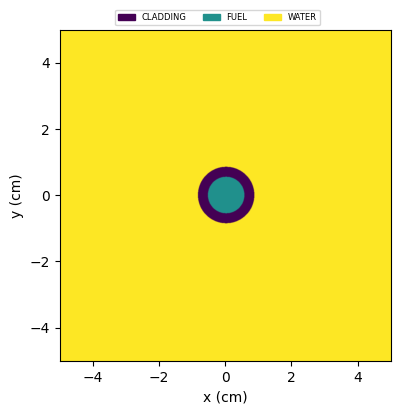

In [12]:
# Define two concentric cylinders with labels
s1 = tripoli5.agora.ZCylinder(0.0, 0.0, 0.55, label="inner_cylinder")
s2 = tripoli5.agora.ZCylinder(0.0, 0.0, 0.85, label="outer_cylinder")

# Create shapes using the cylinders
sh1 = tripoli5.agora.Shape(-s1)  # Inner cylinder
sh2 = tripoli5.agora.Shape(+s1 & -s2)  # Shell between s1 and s2
sh3 = tripoli5.agora.Shape(+s2)  # Outer cylinder

# Create volumes from the shapes and material names
v1 = tripoli5.agora.Volume(sh1, "FUEL", label="inner_fuel")
v2 = tripoli5.agora.Volume(sh2, "CLADDING", label="cladding_shell")
v3 = tripoli5.agora.Volume(sh3, "WATER", label="outer_water")

# Create a universe with a list of volumes
u1 = tripoli5.agora.Universe([v1, v2, v3], label="fuel_universe")

# plot
geom = tripoli5.agora.Geometry(u1)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geom)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-5, u_max=5, v_min=-5, v_max=5
)
_ = plotter.plot(frame=frame, resolution=100)

## Defining Composite Volumes

A `CompositeVolume` is a specific volume made for containing a complex structure instead of a material name.  
As regular `Volume`s, a `CompositeVolume` is delimited by a `Shape` but the material name is replaced by a `filler` which can be fed with an already defined universe or lattice (see the next section).   
In addition, an affine transformation (translation and/or rotation) can optionally be applied to the `filler`.  
Similarly to `Volume`, `CompositeVolume`s can then be used in the list of volumes defining a given universe.  

Below, we wrap the previously defined universe into a box using the composite volume.

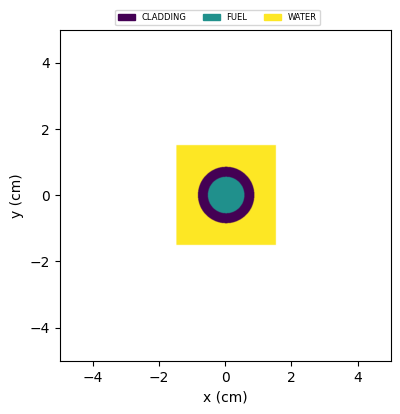

In [13]:
# Define planes to delimit the composite volume with labels
x1 = tripoli5.agora.XPlane(-1.5, label="left_x_plane")
x2 = tripoli5.agora.XPlane(1.5, label="right_x_plane")
y1 = tripoli5.agora.YPlane(-1.5, label="bottom_y_plane")
y2 = tripoli5.agora.YPlane(1.5, label="top_y_plane")

# Create a box shape using the defined planes
box = +x1 & -x2 & +y1 & -y2

# Create a composite volume using the shape and filler universe
composite_volume = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(box), filler=u1, label="composite_volume"
)
# the outside of the box
outside = tripoli5.agora.Volume.outside(
    shape=tripoli5.agora.Shape(-box), label="outside"
)

# Create a universe with a list of volumes
u2 = tripoli5.agora.Universe([composite_volume, outside], label="pincell_in_a_box")

# plot
geom = tripoli5.agora.Geometry(u2)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geom)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-5, u_max=5, v_min=-5, v_max=5
)
_ = plotter.plot(frame=frame, resolution=100)

### Applying an Affine Transformation

An affine transformation is a composition of a **translation** followed by a **rotation**.   
It applies to the composite volume content, i.e. the `filler`.  
In the example below the pincell is translated but the `Shape` of the `CompositeVolume` is not transformed. 

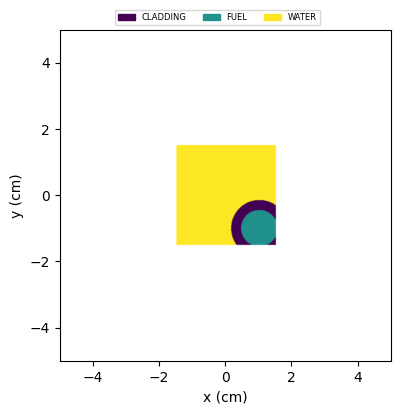

In [14]:
translation = tripoli5.core.euclide.Translation(Vector(1, -1, 0))
transformation = tripoli5.core.euclide.AffineTransformation(translation, None)
# Create a composite volume using the shape and filler universe
composite_volume_2 = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(box),
    filler=u1,
    affinetransformation=transformation,
    label="composite_volume",
)
# the outside of the box
outside = tripoli5.agora.Volume.outside(
    shape=tripoli5.agora.Shape(-box), label="outside"
)

# Create a universe with a list of volumes
u2 = tripoli5.agora.Universe([composite_volume_2, outside], label="pincell_in_a_box")

# plot
geom = tripoli5.agora.Geometry(u2)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geom)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-5, u_max=5, v_min=-5, v_max=5
)
_ = plotter.plot(frame=frame, resolution=100)

## Defining Lattices

A lattice is a way of building repetitive structures on a regular mesh.  
In AGORA, a lattice corresponds to a 1D/2D/3D matrix where each cell is assigned a universe. 
So far, AGORA handles both (Cartesian) rectangular and hexagonal lattices.  

Note that a lattice **must** fill a composite volume. 

### Rectangular Lattices 

A rectangular lattice is instantiated with the following parameters:

- **point**: The lower-left corner of the lattice
- **pitch**: A Vector defining the width of each lattice cell in each dimension
- **nx**: The number of lattice cells along the $x$-axis
- **ny**: The number of lattice cells along the $y$-axis
- **nz**: The number of lattice cells along the $z$-axis
- **universe**: The universe filling each cell
- **outer_universe**: A universe filling the complementary space surrounding the lattice (optional)
- **label**: An optional label for the lattice

*Note:* if **nz** is null then the lattice is infinite along the $z$-axis. The same holds for $x$ and $y$.  
*Note:* the filling **universe** is automatically translated so that the origin of the universe coincides with the center of each lattice cell. 

Below is an example of a $10 \times 10 \times 0$ lattice; each cell containing the previously defined pincell universe

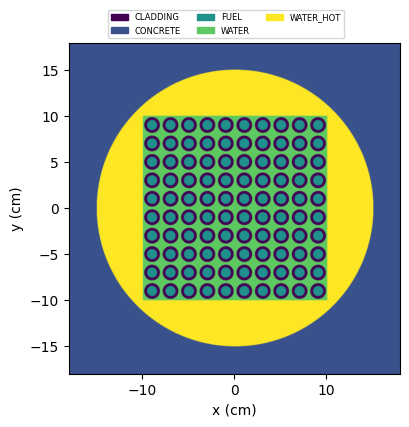

In [15]:
# Define the lower-left corner of the lattice
lower_left = Point(-10.0, -10.0, -10.0)

# Define the pitch vector for the lattice
pitch = Vector(2.0, 2.0, 2.0)

# Create an infinite background universe filled with concrete
background_universe = tripoli5.agora.createInfinite(material="WATER_HOT")

# Create a rectangular lattice
lattice = tripoli5.agora.RectLattice(
    point=lower_left,
    pitch=pitch,
    nx=10,
    ny=10,
    nz=0,
    universe=u1,
    outer_universe=background_universe,  # Optional
    label="lattice_base_10x10",  # Optional
)

# Define a box to delimit the lattice
cyl = tripoli5.agora.ZCylinder(0.0, 0.0, 15.0)

lattice_volume = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(-cyl), filler=lattice
)
concrete_volume = tripoli5.agora.Volume(
    shape=tripoli5.agora.Shape(+cyl), material="CONCRETE"
)

root_universe = tripoli5.agora.Universe([lattice_volume, concrete_volume])
# Create a geometry with the root universe
geometry = tripoli5.agora.Geometry(root_universe=root_universe)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geometry)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-18, u_max=18, v_min=-18, v_max=18
)
_ = plotter.plot(frame=frame, resolution=50)

#### Setting specific lattice cells

We can fill some specific lattice cells with a given universe.

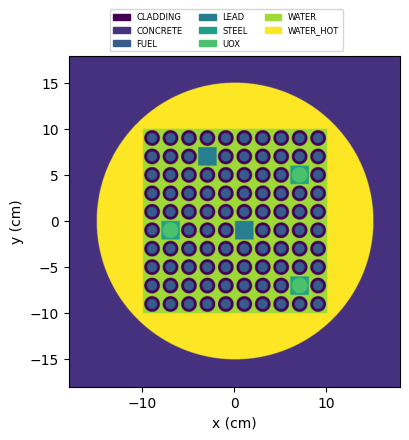

In [16]:
# Define another universe
sh11 = tripoli5.agora.Shape(-s2)
sh12 = tripoli5.agora.Shape(+s2)

# Create volumes from the shapes and assign materials
v11 = tripoli5.agora.Volume(sh11, "UOX", label="uox_volume")
v12 = tripoli5.agora.Volume(sh12, "STEEL", label="steel_volume")

# Create a universe with the defined volumes
u3 = tripoli5.agora.Universe([v11, v12], label="uox_steel_universe")
u4 = tripoli5.agora.createInfinite(material="LEAD")

# Set lattice cells to the new universe
lattice[1, 4, 0] = u3
lattice[8, 7, 0] = u3
lattice[8, 1, 0] = u3
lattice[5, 4, 0] = u4
lattice[3, 8, 0] = u4

lattice_volume = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(-cyl), filler=lattice
)
concrete_volume = tripoli5.agora.Volume(
    shape=tripoli5.agora.Shape(+cyl), material="CONCRETE"
)

root_universe = tripoli5.agora.Universe([lattice_volume, concrete_volume])
# Create a geometry with the root universe
geometry = tripoli5.agora.Geometry(root_universe=root_universe)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geometry)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-18, u_max=18, v_min=-18, v_max=18
)
_ = plotter.plot(frame=frame, resolution=50)

### Hexagonal Lattices 

A hexagonal lattice is instantiated with the following parameters:

- **point**: The center point of the lattice
- **hex_pitch**: The pitch of the hexagon
- **axial_pitch**: The pitch in the axial direction
- **nb_rings**: The number of rings 
- **n_axial**: The number of axial layers
- **universe**: The universe filling each cell
- **outer_universe**: A universe filling the complementary space surrounding the lattice (optional)
- **label**: An optional label for the lattice


*Note:* if **n_axial** is null then the lattice is infinite along the $z$-axis.
*Note:* the filling **universe** is automatically translated so that the origin of the universe coincides with the center of each lattice cell. 

Below is an example of a hexagonal lattice; each cell containing the previously defined pincell universe.  
The lattice is composed of 3 rings, with a pitch of 3 cm. 

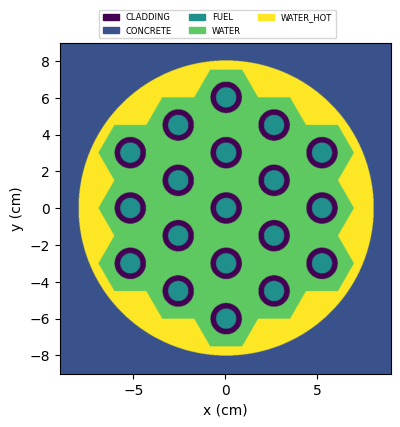

In [17]:
center_point = Point(0.0, 0.0, 0.0)

hex_lattice = tripoli5.agora.HexLattice(
    point=center_point,
    hex_pitch=3.0,
    axial_pitch=10.0,
    nb_rings=3,
    n_axial=0,
    universe=u1,
    outer_universe=background_universe,  # optional
    label="hexagonal_lattice",  # optional
)

# Define a box to delimit the lattice
hex_cyl = tripoli5.agora.ZCylinder(0.0, 0.0, 8.0)
hex_lattice_volume = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(-hex_cyl), filler=hex_lattice
)
concrete_volume = tripoli5.agora.Volume(
    shape=tripoli5.agora.Shape(+hex_cyl), material="CONCRETE"
)

root_universe = tripoli5.agora.Universe([hex_lattice_volume, concrete_volume])
# Create a geometry with the root universe
geometry = tripoli5.agora.Geometry(root_universe=root_universe)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geometry)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-9, u_max=9, v_min=-9, v_max=9
)
_ = plotter.plot(frame=frame, resolution=50)

#### Setting specific lattice cells

We can fill some specific lattice cells with a given universe.  
The numbering of the hexagonal lattice follows a usual pattern for hexagonal lattice; below is an example of the x-y numbering for a 3 rings lattice.

```
                     (0, 2)
              (-1, 2)      (1, 1)
       (-2, 2)       (0, 1)       (2, 0)
              (-1, 1)      (1, 0)
       (-2, 1)       (0, 0)       (2,-1)
              (-1,0)       (1, -1)
       (-2, 0)       (0,-1)       (2,-2)
              (-1,-1)      (1, -2)
                     (0,-2)
```

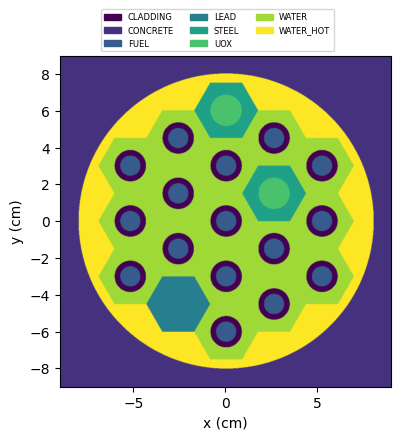

In [18]:
# Set lattice cells to the new universe
hex_lattice[0, 2, 0] = u3
hex_lattice[1, 0, 0] = u3
hex_lattice[-1, -1, 0] = u4

# Create a geometry with the root universe for plotting purpose
root_universe = tripoli5.agora.Universe([hex_lattice_volume, concrete_volume])
geometry = tripoli5.agora.Geometry(root_universe=root_universe)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geometry)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-9, u_max=9, v_min=-9, v_max=9
)
_ = plotter.plot(frame=frame, resolution=50)

#### Setting specific lattice cells

By default, the assembly is generated with a "corner on top" which can be modified by applying an affine transformation consisting of a rotation to get the "flat side on top".

Below is the previous assembly rotated by 90° to the left; note that a transformation of 30° also works.  

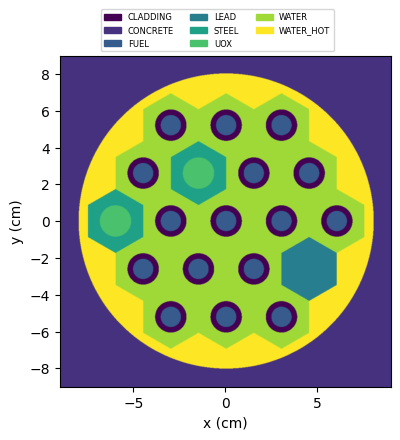

In [19]:
rotation = tripoli5.core.euclide.Rotation(Vector(0.0, 0.0, 90.0))
transformation = tripoli5.core.euclide.AffineTransformation(None, rotation)
hex_cyl = tripoli5.agora.ZCylinder(0.0, 0.0, 8.0)
hex_lattice_volume = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(-hex_cyl),
    filler=hex_lattice,
    affinetransformation=transformation,
)
concrete_volume = tripoli5.agora.Volume(
    shape=tripoli5.agora.Shape(+hex_cyl), material="CONCRETE"
)
# Set lattice cells to the new universe
hex_lattice[0, 2, 0] = u3
hex_lattice[1, 0, 0] = u3
hex_lattice[-1, -1, 0] = u4
root_universe = tripoli5.agora.Universe([hex_lattice_volume, concrete_volume])
# Create a geometry with the root universe
geometry = tripoli5.agora.Geometry(root_universe=root_universe)
plotter = tripoli5.geoplotter.GeoPlotterPyplot(geometry)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-9, u_max=9, v_min=-9, v_max=9
)
_ = plotter.plot(frame=frame, resolution=50)

## Geometry
The `tripoli5.agora.Geometry` instantiates a geometry model from a "root" universe. 
It is now ready to be used in the simulation or the plotter and also exported into a binary file for future re-use. 

Below we create the geometry from the last lattice_volume. 

Number of geometry volumes : 8


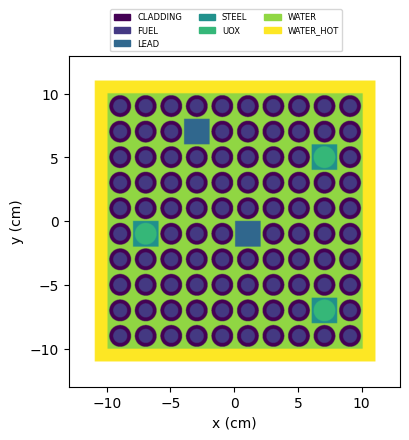

In [20]:
# Define a box to delimit the lattice
x1 = tripoli5.agora.XPlane(-11, label="left_x_plane")
x2 = tripoli5.agora.XPlane(11, label="right_x_plane")
y1 = tripoli5.agora.YPlane(-11, label="bottom_y_plane")
y2 = tripoli5.agora.YPlane(11, label="top_y_plane")

# Create a box shape using the defined planes
box = +x1 & -x2 & +y1 & -y2

# Create a universe with a list of volumes
lattice_volume = tripoli5.agora.CompositeVolume(
    shape=tripoli5.agora.Shape(box), filler=lattice
)
outside_volume = tripoli5.agora.Volume.outside(shape=tripoli5.agora.Shape(-box))
root_universe = tripoli5.agora.Universe(
    volumes=[lattice_volume, outside_volume], label="root_universe"
)

# Create a geometry with the root universe
geometry = tripoli5.agora.Geometry(root_universe=root_universe)

# Get the number of geometry volumes
print(f"Number of geometry volumes : {geometry.nb_volumes}")

plotter = tripoli5.geoplotter.GeoPlotterPyplot(geometry)
frame = tripoli5.geoplotter.Frame.fromMinMax(
    "XY", altitude=0, u_min=-13, u_max=13, v_min=-13, v_max=13
)
_ = plotter.plot(frame=frame, resolution=50)

### Exporting/Loading a geometry

After the creation of the geometry, it can be exported as an AGORA binary file using the `serialize` method.  
This method's argument is a **path** to file that will be created.

In [21]:
# Serialize the geometry to a file
geometry.serialize(filename="./my_own_geometry.agora")

Loading an AGORA binary file is perfomed using the `deserialize` method. 

In [22]:
# Deserialize the geometry from a file
deserialized_geometry = tripoli5.agora.Geometry.deserialize(
    filename="./my_own_geometry.agora"
)